# Практика

## Предсказание оттока телеком компании

#### Что такое "скорость оттока"?

Коэффициент оттока - это процент подписчиков на услугу, которые прекращают свою подписку на услугу в течение заданного периода времени. Для того чтобы компания могла расширить свою клиентуру, ее темпы роста, измеряемые числом новых клиентов, должны превышать темпы оттока. Этот показатель обычно выражается в процентах.

#### Почему отток так важен?

Отток клиентов - это термин, используемый в компаний с подписочной моделью ведения бизнеса, для описания потери клиентов. Например, если 10 из 100 подписчиков интернет-провайдера (ISP) отменили свои подписки, скорость оттока для этого провайдера составит 10%.

Отток важен, потому что он напрямую влияет на прибыльность вашего сервиса. Принято считать, что прибыльность услуги напрямую связана с ростом ее клиентской базы. Это может привести владельцев бизнеса к выводу, что для того, чтобы увеличить свою клиентскую базу, скорость приобретения новых клиентов должна превышать скорость оттока.

#### Что из себя представляет датасет?

Датасет представляет из себя 3333 записи из истории компании о клиентах с 20 колонками. Каждая колонка описывает клиента - его штат проживания, время использования услуги, номер, перечень подписок, время разговора, прочее.

##### Более конкретно
-   State: штат США, в котором проживает клиент, обозначенный двухбуквенным сокращением; например, OH или NJ
-   Account Length: количество дней, в течение которых этот аккаунт был активным
-   Area Code: трехзначный код города соответствующего номера телефона клиента
-   Phone: оставшийся семизначный номер телефона
-   Int’l Plan: есть ли у клиента международный тарифный план: да / нет
-   VMail Plan: есть ли у клиента функция голосовой почты: да / нет
-   VMail Message: предположительно среднее количество сообщений голосовой почты в месяц
-   Day Mins: общее количество минут, использованных в течение дня
-   Day Calls: общее количество звонков за день
-   Day Charge: оплачиваемая стоимость дневных звонков
-   Eve Mins, Eve Calls, Eve Charge: оплачиваемая стоимость звонков, сделанных в течение вечера
-   Night Mins, Night Calls, Night Charge: оплачиваемая стоимость звонков в ночное время
-   Intl Mins, Intl Calls, Intl Charge: расчетная стоимость международных звонко
-   CustServ Calls: количество звонков в службу поддержки
-   Churn?: клиент ушёл: да / нет

------

## Загрузка данных

Клонируем файлы с гита

In [ ]:
!git clone https://github.com/tixonsit/Sberbank_materials.git

fatal: destination path 'Sberbank_materials' already exists and is not an empty directory.


Загружаем все необходимые библиотеки

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from matplotlib.colors import ListedColormap

[Открываем](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) склонированную папку

In [ ]:
df = pd.read_csv('/content/Sberbank_materials/telecom_churn.csv')

[Отображаем](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) данные

In [ ]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


В случае, если вы работаете из среды анаконда - вам необходимо положить файл рядом с ноутбуком и выполнить:

```
df = pd.read_csv('./telecom_churn.csv')
```

 

## Работа с признаками

#### Визуальный анализ

Изучим наши данные, какие признаки исходного датасета никак не повлияют на результат прогноза? Выбросим такие столбцы и отобразим результат.

In [ ]:
df = df.drop(['phone number'],axis=1)
df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Посмотрим на описательную статистику, которая суммирует центральную тенденцию, дисперсию и форму распределения набора данных. Корректно ли все заполнено?

In [ ]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


Посмотрим на типы данных наших столбцов:

In [ ]:
df.dtypes

state                      object
account length              int64
area code                   int64
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

#### Работа с категориальными признаками

Если вы не понимаете логику за работой с категориальными признаками - посмотрите [сюда](https://www.coursera.org/lecture/supervised-learning/rabota-s-katieghorial-nymi-priznakami-pqU2j), если же не знаете как это сделать в коде - [сюда](https://colab.research.google.com/drive/17UJ3zkE6dUL5UpQnLiaQp3f7BpV6iEss#scrollTo=_238K7-NQajf), пункт про категориальные признаки.

Посмотрим на те колонки, в которых тип данных object (строка) и перекодируем их, воспользуемся кодом с занятия.

In [ ]:
# Подключаем класс для предобработки данных
from sklearn import preprocessing

# Напишем функцию, которая принимает на вход DataFrame, кодирует числовыми значениями категориальные признаки
# и возвращает обновленный DataFrame и сами кодировщики.
def number_encode_features(init_df):
    result = init_df.copy() # копируем нашу исходную таблицу
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object: # np.object -- строковый тип / если тип столбца - строка, то нужно его закодировать
            encoders[column] = preprocessing.LabelEncoder() # для колонки column создаем кодировщик
            result[column] = encoders[column].fit_transform(result[column]) # применяем кодировщик к столбцу и перезаписываем столбец
    return result, encoders

encoded_data, encoders = number_encode_features(df) # Теперь encoded data содержит закодированные кат. признаки 
encoded_data.head() 

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,35,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Отобразим сами энкодеры

In [ ]:
encoders

{'international plan': LabelEncoder(),
 'state': LabelEncoder(),
 'voice mail plan': LabelEncoder()}

Выделим целевую переменную в бинарный формат и выкенем ее из обучающей выборки.

In [ ]:
y = encoded_data['churn'].map({True: 1, False: 0}).values
encoded_data.drop(['churn'], axis = 1, inplace=True)
print('Ответы\n',y)
print('Обучающая выборка')
encoded_data.head()

Ответы
 [0 0 0 ... 0 0 0]
Обучающая выборка


,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,35,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [ ]:
y

array([0, 0, 0, ..., 0, 0, 0])

Посмотрим на распределение велечин по признакам в наших данных

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3af31c96a0>,
      dtype=object)

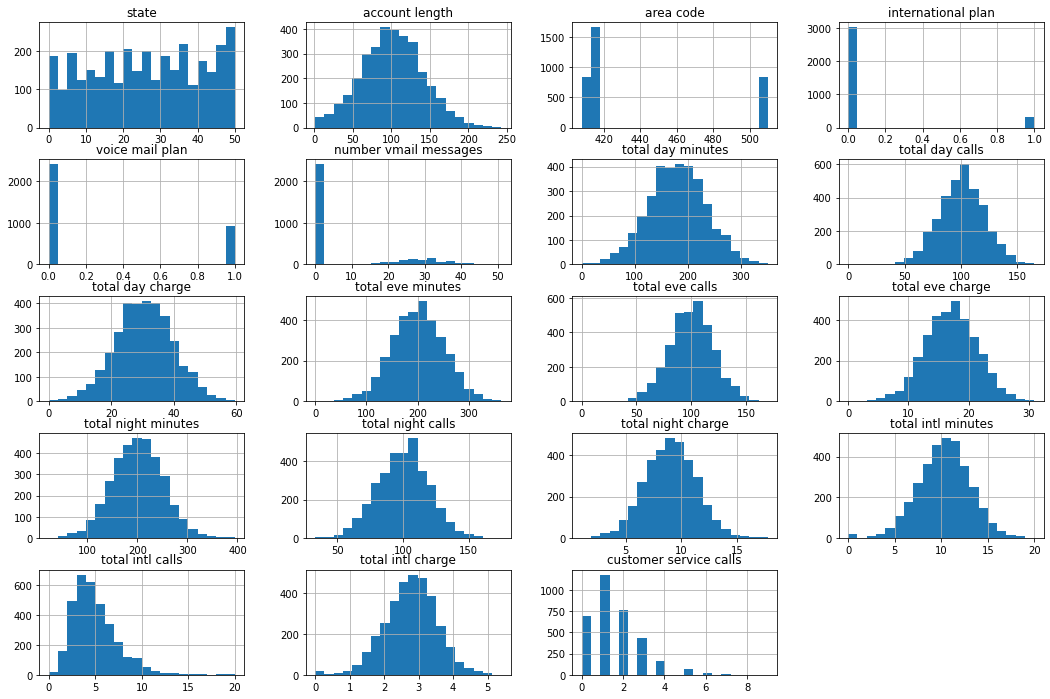

In [ ]:
encoded_data.hist(figsize=(18, 12), layout=(5,4), bins=20)

Посмтроим матрицу корреляций, выбросим данные с единичной линейной зависимостью - они (шум) просто повысят вычислительную сложность.

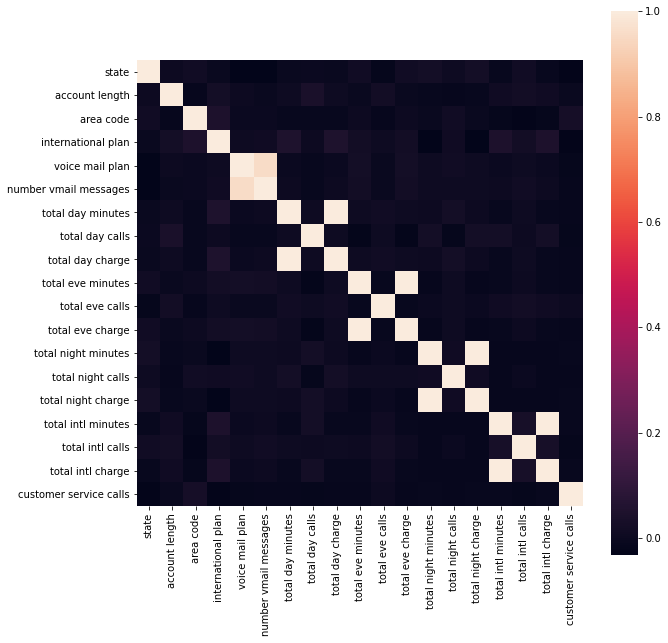

In [ ]:
plt.subplots(figsize=(10,10))
sns.heatmap(encoded_data.corr(), square=True)
plt.show()

In [ ]:
encoded_data.drop(['total day charge',
                   'total eve charge',
                   'total night charge',
                   'total intl charge'], axis = 1, inplace=True)
encoded_data.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls
0,16,128,415,0,1,25,265.1,110,197.4,99,244.7,91,10.0,3,1
1,35,107,415,0,1,26,161.6,123,195.5,103,254.4,103,13.7,3,1
2,31,137,415,0,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0
3,35,84,408,1,0,0,299.4,71,61.9,88,196.9,89,6.6,7,2
4,36,75,415,1,0,0,166.7,113,148.3,122,186.9,121,10.1,3,3


## Работа с моделью
Теперь, когда данные приведены к числовой форме, мы можем переходить к построению модели.

Необходимо довести до конца процесс
1.  Загрузка данных
2.  Подготовка данных
3.  Разбиение на обучение и тест
4.  Оценка работы модели на кросс валидации
5.  Выбор наилучшего набора параметров на основе кросс валидации
6.  Обучение модели на всем наборе данных для обучения
7.  Сбор метрик на обучении и тесте
8.  Принятие решения


Часть шагов мы уже сделали выше. 

Выберите одно из семейств рассмотренных на занятии моделей, и попробуйте получить как можно более хороший результат на тестовой выборке по метрике accuracy.

In [ ]:
encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   int64  
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   international plan      3333 non-null   int64  
 4   voice mail plan         3333 non-null   int64  
 5   number vmail messages   3333 non-null   int64  
 6   total day minutes       3333 non-null   float64
 7   total day calls         3333 non-null   int64  
 8   total eve minutes       3333 non-null   float64
 9   total eve calls         3333 non-null   int64  
 10  total night minutes     3333 non-null   float64
 11  total night calls       3333 non-null   int64  
 12  total intl minutes      3333 non-null   float64
 13  total intl calls        3333 non-null   int64  
 14  customer service calls  3333 non-null   

In [ ]:
encoded_data


,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls
0,16,128,415,0,1,25,265.1,110,197.4,99,244.7,91,10.0,3,1
1,35,107,415,0,1,26,161.6,123,195.5,103,254.4,103,13.7,3,1
2,31,137,415,0,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0
3,35,84,408,1,0,0,299.4,71,61.9,88,196.9,89,6.6,7,2
4,36,75,415,1,0,0,166.7,113,148.3,122,186.9,121,10.1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,3,192,415,0,1,36,156.2,77,215.5,126,279.1,83,9.9,6,2
3329,49,68,415,0,0,0,231.1,57,153.4,55,191.3,123,9.6,4,3
3330,39,28,510,0,0,0,180.8,109,288.8,58,191.9,91,14.1,6,2
3331,6,184,510,1,0,0,213.8,105,159.6,84,139.2,137,5.0,10,2


In [ ]:
# ваш код тут
from sklearn import model_selection

In [ ]:
#разобьем данные на обучающую и тестовые части

train_data, test_data, train_labels, test_labels = model_selection.train_test_split (encoded_data, y, stratify=y, test_size=0.3,)

In [ ]:
train_data

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls
31,30,75,510,0,0,0,226.1,105,201.5,107,246.2,98,10.3,5,1
1589,0,76,415,0,0,0,143.7,55,173.1,108,239.1,95,5.8,6,1
1419,32,65,415,0,0,0,105.7,95,141.8,100,180.5,105,6.6,12,2
700,49,121,415,0,0,0,103.3,110,129.1,82,167.1,113,10.7,3,0
1702,37,140,415,0,0,0,120.3,108,240.4,84,216.4,74,7.7,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
740,44,67,510,0,1,20,230.6,40,189.1,58,162.2,115,9.4,2,1
1677,16,123,415,0,0,0,163.1,119,249.4,51,168.2,77,9.0,10,1
1157,9,116,408,0,0,0,146.4,123,176.6,113,212.6,102,7.8,5,1
339,0,78,408,0,0,0,225.1,67,199.2,127,175.5,102,14.6,2,0


In [ ]:
test_data

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls
2227,40,41,408,0,0,0,237.8,92,223.5,155,217.4,90,10.2,6,2
685,5,63,415,0,1,32,30.9,113,187.0,113,230.8,101,8.6,7,1
2821,43,130,408,0,0,0,252.0,101,170.2,105,209.2,64,5.7,5,0
578,5,90,408,0,1,30,183.8,76,229.7,95,144.1,124,7.7,3,1
2849,15,156,510,0,0,0,237.7,122,181.5,91,185.7,151,7.7,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,44,157,408,0,0,0,229.8,90,147.9,121,241.4,108,9.6,7,3
77,34,144,408,0,0,0,61.6,117,77.1,85,173.0,99,8.2,7,4
3157,2,127,415,1,0,0,143.2,60,179.5,159,171.8,122,6.2,4,4
411,33,64,415,0,0,0,97.2,80,186.2,90,189.0,92,10.4,6,2


In [ ]:
#вызываю 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, ParameterGrid

In [ ]:
# GridSearchCV подбор параметров
parametrs = {'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 
                    'leaf_size': [10,20,30], 'metric': ['minkowski'],
                     'n_neighbors': [2,3,4,5], 'p': [2,3,4],
                       'weights': ['uniform', 'distance']}

model_GS=GridSearchCV(KNeighborsClassifier(), parametrs, cv=5 )

In [ ]:
model_GS.fit(encoded_data, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 30], 'metric': ['minkowski'],
                         'n_neighbors': [2, 3, 4, 5], 'p': [2, 3, 4],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
model_GS.best_params_ #лушчие параметры для модели KNN

{'algorithm': 'auto',
 'leaf_size': 10,
 'metric': 'minkowski',
 'n_neighbors': 4,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
model = KNeighborsClassifier(algorithm='auto', leaf_size=10, metric='minkowski', n_neighbors=4, p=2, weights='uniform')

In [ ]:
#обучаю модель на лучших параметрах
model.fit(train_data, train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=10, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [ ]:
train_predicts = model.predict(train_data)
train_predicts

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
accuracy_score(train_labels, train_predicts)

0.8864123446206601

In [ ]:
test_predicts = model.predict(test_data)
accuracy_score(test_labels, test_predicts)

0.88

In [ ]:
#решила взять еще модель Naive Bayes
from sklearn.naive_bayes import GaussianNB

In [ ]:
model = GaussianNB()

In [ ]:
model.fit(train_data, train_labels)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
train_predicts = model.predict(train_data)
train_predicts

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
accuracy_score(train_labels, train_predicts)

0.8521217316759537

In [ ]:
test_predicts = model.predict(test_data)
accuracy_score(test_labels, test_predicts)

0.851

In [ ]:
pd.DataFrame(y).value_counts()


0    2850
1     483
dtype: int64

По итогам работы модель KNN имеет более высокую оценку


### Вопросы напоследок


1.   Корректно ли использование метрики accuracy для данной задачи? Если нет, то почему?

Метрика accuracy  имеет некоторые недостатки: она не идеальна для несбалансированных классов, где может быть много экземпляров одного класса и мало другого. accurace(f=0)=0.84. Кмк в данном наборе данных эта метрика не дает достоверноверной оценки моделей.

2.   **Доп. задача**. Исследуйте влияние [масштабирования признаков](https://qna.habr.com/q/290049) на результат работы вашей модели (нужно преобразовать данные, и обучить на них новую модель). Для этого удобно использовать метод sklearn.preprocessing.StandardScaler(). Результат исследований приведите в клетках ниже.



In [ ]:
#используем формулу
# data_numerical = data[numerical_columns]
# data_numerical = (data_numerical - data_numerical.mean()) / data_numerical.std()
# data_numerical.describe()

In [ ]:
#создаю копию данных для нормализации
exp_data=encoded_data.copy()

In [ ]:
encoded_data # y - колонка churn, в наборе отсутствует

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls
0,16,128,415,0,1,25,265.1,110,197.4,99,244.7,91,10.0,3,1
1,35,107,415,0,1,26,161.6,123,195.5,103,254.4,103,13.7,3,1
2,31,137,415,0,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0
3,35,84,408,1,0,0,299.4,71,61.9,88,196.9,89,6.6,7,2
4,36,75,415,1,0,0,166.7,113,148.3,122,186.9,121,10.1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,3,192,415,0,1,36,156.2,77,215.5,126,279.1,83,9.9,6,2
3329,49,68,415,0,0,0,231.1,57,153.4,55,191.3,123,9.6,4,3
3330,39,28,510,0,0,0,180.8,109,288.8,58,191.9,91,14.1,6,2
3331,6,184,510,1,0,0,213.8,105,159.6,84,139.2,137,5.0,10,2


In [ ]:
# было:
#взяла и в цикле нормализовала всю таблицу
# for column in exp_data.columns:
#  exp_data[column] = (exp_data[column]-exp_data[column].mean())/exp_data[column].std()
# исправлено:
exp_data = (exp_data-exp_data.mean())/exp_data.std()

In [ ]:
exp_data

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls
0,-0.678547,0.676388,-0.523525,-0.327531,1.616843,1.234697,1.566532,0.476572,-0.070599,-0.055932,0.866613,-0.465425,-0.084995,-0.601105,-0.427868
1,0.603079,0.149043,-0.523525,-0.327531,1.616843,1.307752,-0.333688,1.124334,-0.108064,0.144845,1.058412,0.147802,1.240296,-0.601105,-0.427868
2,0.333263,0.902393,-0.523525,-0.327531,-0.618303,-0.591671,1.168128,0.675883,-1.573147,0.496204,-0.756756,0.198905,0.703015,0.211502,-1.188040
3,0.603079,-0.428526,-0.688731,3.052227,-0.618303,-0.591671,2.196267,-1.466716,-2.742453,-0.608068,-0.078539,-0.567629,-1.302831,1.024109,0.332305
4,0.670533,-0.654531,-0.523525,3.052227,-0.618303,-0.591671,-0.240054,0.626055,-1.038776,1.098534,-0.276270,1.067643,-0.049177,-0.601105,1.092477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,-1.555450,2.283536,-0.523525,-0.327531,1.616843,2.038300,-0.432830,-1.167749,0.286305,1.299311,1.546807,-0.874243,-0.120814,0.617806,0.332305
3329,1.547436,-0.830313,-0.523525,-0.327531,-0.618303,-0.591671,0.942305,-2.164306,-0.938212,-2.264476,-0.189269,1.169848,-0.228270,-0.194801,1.092477
3330,0.872895,-1.834780,1.718559,-0.327531,-0.618303,-0.591671,0.018817,0.426744,1.731670,-2.113894,-0.177405,-0.465425,1.383570,0.617806,0.332305
3331,-1.353088,2.082642,1.718559,3.052227,-0.618303,-0.591671,0.624684,0.227432,-0.815958,-0.808845,-1.219445,1.885279,-1.875929,2.243020,0.332305


Теперь разделю данные и попробую обучить обе модели на этих данных

In [ ]:
train_data, test_data, train_labels, test_labels = model_selection.train_test_split (exp_data, y, stratify=y, test_size=0.3,)

In [ ]:
train_data

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls
795,-1.218180,-0.227633,-0.523525,-0.327531,-0.618303,-0.591671,0.316242,-0.818953,1.347160,0.245233,-0.829916,0.250007,0.201554,-0.194801,-0.427868
89,0.333263,0.676388,-0.523525,-0.327531,-0.618303,-0.591671,1.067151,1.223990,0.919269,-0.357097,0.158737,-1.640776,1.311933,-0.194801,-0.427868
1407,-0.071461,-0.704754,-0.523525,-0.327531,1.616843,1.673026,-1.789605,0.227432,1.086876,-0.457485,0.568040,-0.107709,0.559741,-1.007408,3.372994
2448,1.277619,0.927505,-0.523525,-0.327531,-0.618303,-0.591671,1.307661,0.925023,-2.164702,-0.206515,-1.160126,-0.669834,1.276114,-0.601105,1.092477
2972,-0.004007,1.153510,-0.523525,-0.327531,1.616843,1.965245,0.321750,1.672441,-1.180750,-0.055932,0.222011,-0.516527,-0.049177,-0.194801,0.332305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,0.130901,-0.076962,1.718559,-0.327531,-0.618303,-0.591671,0.136318,1.323646,-0.106092,-0.608068,-0.377113,1.476461,-1.840111,-0.194801,-0.427868
2219,1.547436,-0.177409,-0.523525,-0.327531,1.616843,1.453862,-1.598665,0.327088,-1.443005,-0.708456,0.488948,-0.720936,-0.120814,-0.194801,1.092477
1718,-1.555450,0.199266,-0.523525,3.052227,-0.618303,-0.591671,1.627119,-0.769125,-0.993424,1.550282,1.918540,-0.823140,-0.192452,1.430413,0.332305
3315,-0.341277,1.203733,-0.523525,-0.327531,1.616843,0.723314,-0.574199,0.277260,-1.705261,0.295427,-0.446318,-0.107709,-1.338649,-0.194801,-1.188040


In [ ]:
test_data

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls
2124,-0.678547,-1.458105,-0.523525,-0.327531,-0.618303,-0.591671,-2.804891,0.825367,-0.790324,-0.156320,1.554716,-0.209913,0.165735,-0.601105,1.092477
1864,-0.476185,-0.805201,1.718559,-0.327531,-0.618303,-0.591671,0.281359,-0.470158,1.193356,-2.164088,0.057895,-0.516527,0.416466,0.211502,-1.188040
298,-0.341277,0.299713,-0.523525,-0.327531,-0.618303,-0.591671,0.655895,1.423301,0.349405,0.847563,0.123146,-0.465425,-1.302831,1.836716,1.852649
1090,-1.690358,0.751723,1.718559,-0.327531,-0.618303,-0.591671,-0.484236,-0.719298,-0.048909,-0.959427,-0.721164,-0.874243,0.058279,-0.601105,-1.188040
80,1.547436,1.078175,-0.523525,-0.327531,-0.618303,-0.591671,0.391517,-0.071535,2.021532,-1.310787,0.457311,0.965439,1.061202,-1.007408,-0.427868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2651,-1.150726,0.174154,1.718559,-0.327531,-0.618303,-0.591671,0.567769,0.576227,0.743774,-1.360981,1.042593,-0.516527,-0.371545,0.211502,1.092477
2663,1.277619,1.781302,1.718559,-0.327531,-0.618303,-0.591671,-0.183139,1.124334,-0.352573,-0.306903,3.838505,-1.436367,0.882109,1.024109,0.332305
2785,-0.206369,-1.583663,1.718559,-0.327531,-0.618303,-0.591671,-0.074817,0.426744,0.213347,-0.156320,-1.245150,0.454416,-0.371545,-0.601105,2.612822
1678,1.345073,-0.930760,-0.688731,-0.327531,-0.618303,-0.591671,-0.629277,0.775539,0.540674,0.496204,1.434100,-0.465425,-0.479001,1.430413,-0.427868


In [ ]:
#модель KNN
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(train_data, train_labels)
from sklearn.metrics import accuracy_score


In [ ]:
accuracy_score(train_labels, train_predicts)

0.7621088726960994

In [ ]:
test_predicts = model.predict(test_data)
accuracy_score(test_labels, test_predicts)

0.878

In [ ]:
#модель Naive Bayes
model = GaussianNB()

In [ ]:
model.fit(train_data, train_labels)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
train_predicts = model.predict(train_data)
train_predicts

array([0, 0, 1, ..., 1, 0, 1])

In [ ]:
accuracy_score(train_labels, train_predicts)

0.8508358336905272

In [ ]:
test_predicts = model.predict(test_data)
accuracy_score(test_labels, test_predicts)

0.848

Смотрю на результаты в сравнении с ненормализованными данными и получается, что для модели KNN результат хуже, а для модели Naive Bayes лучше. Очевидно это вытекает из свойств самих моделей. 